This script aims to calculate and plot the dispersion of anti-resonant hollowcore fibre based on the results in 'Analytic model for the complex
effective index of the leaky modes of tube-type anti-resonant hollowcore fibers', Zeisberger et al.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

The main equation we wish to model is:
$$ Re(n_{\textrm{\textit{eff}}}) = n_a - \frac{j^2}{2k_0^2n_a R^2} - \frac{j^2}{k_0^3 n_a^2 R^3}\frac{\cot(\phi)}{\sqrt{\varepsilon - 1}}\frac{(\varepsilon + 1)}{2}$$
for $HE_{11}$. In this equation, $n_a \approx 1$ is the refractive index of air, 


$\phi = k_0 \omega \sqrt{n_g^2 - n_a^2} \left(1 + O\left(\frac{\kappa}{k_0}\right)^2\right)$,  $k_0$ is the longditudinal $k$ vector in vacuum $\omega / c$
and $\varepsilon = n_g^2 / n_a^2$ with $n_g$ being the refractive index of the glass capillary.

$R$ is the core diameter ($\approx 20 \mu m$), and $j = j_{m-1,n}$ represents the $n$-th root of the Bessel function (of order $m$) $j_m$; i.e. the 1st root of $j_0$.

In [2]:
from scipy.special import jn_zeros

def find_bessel_zero(m, n):
    # m is the order of the Bessel function
    # n is the index of the zero (0-based)

    # Using jn_zeros to get the zeros of the Bessel function
    zeros = jn_zeros(m, n+1)  # n+1 because the function is 0-indexed

    # Return the nth zero
    return zeros[n]

In [ ]:
import RefractiveIndexClass as ri
import matplotlib.pyplot as plt
import numpy as np
c=3e8
wavelengths = np.linspace(1000, 2000, 1000)
omegas = np.linspace(2 * np.pi * c / 1000e-9, 2 * np.pi * c/ 2000e-9, 1000)
ri_w = ri.RefractiveIndex.n_fs(wavelengths, parameter="wavelength")
ri_o = ri.RefractiveIndex.n_fs(2 * np.pi * c / wavelengths, parameter="omega")
plt.plot(wavelengths, ri_w)
plt.show()
plt.plot(2 * np.pi * c / wavelengths, ri_o)
plt.show()


Define the key parameters:

j is:  5.520078110286311
In the function
omega
In the function
wavelength


(-0.001, 0.0)

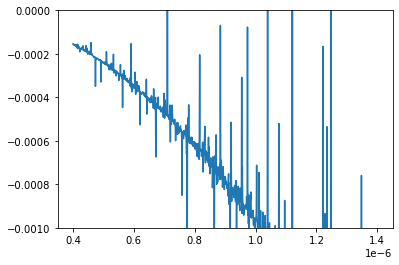

In [13]:
import RefractiveIndexClass as ri
import matplotlib.pyplot as plt
import numpy as np
import math
c = 3e8 # m/s
omegas = np.linspace(2 * np.pi * c / 1000e-9, 2 * np.pi * c/ 2000e-9, 1000)
lambdas = np.linspace(400e-9, 1400e-9, 1000)
n_a = 1.0
jz = find_bessel_zero(0, 1)
print("j is: ", jz)
k_0 = omegas / c
k_0_lambda = 2 * np.pi / lambdas
R = 20e-6
n_g = ri.RefractiveIndex.n_fs(omegas, parameter="omega")
n_g_lambda = ri.RefractiveIndex.n_fs(lambdas*1e9, parameter="wavelength")
# plt.plot(lambdas, n_g_lambda)
# plt.show()
phi = k_0 * omegas * np.sqrt(n_g**2 - n_a**2)
phi_lambda = k_0_lambda * (2 * np.pi * c / lambdas) * np.sqrt(n_g_lambda**2 - n_a**2)
# print(phi)
epsilon = n_g**2
epsilon_lambda = n_g_lambda**2/n_a**2
cot_phi = 1/np.tan(phi)
n_eff = n_a - ((jz**2)/(2 * k_0**2 * n_a * R**2)) - ((jz**2)/(k_0**3 * n_a**2 * R**3)) * ((cot_phi)/(np.sqrt(epsilon - 1)))*((epsilon + 1))/(2)
n_eff_lambda = n_a - (jz**2)/(2 * k_0_lambda**2 * n_a * R**2) - (jz**2)/(k_0_lambda**3 * n_a**2 * R**3)*(1)/(np.tan(phi_lambda) * np.sqrt(epsilon_lambda - 1))*((epsilon_lambda + 1))/(2)
plt.plot(lambdas, n_eff_lambda-1)
plt.ylim([-10e-4,0])